# Chapter: 16
## Section: Differential privacy

In [1]:
import numpy as np
np.random.seed(42)

def gaussian_add_noise(query_result: float, sensitivity: float, epsilon: float):
    # Calculating the standard deviation parameter for the Gaussian distribution
    std_dev = sensitivity / epsilon

    # Generating and add Gaussian noise to the query result
    noise = np.random.normal(loc=0.0, scale=std_dev)
    noisy_result = query_result + noise

    return noisy_result

In [2]:
# Example
query_result = 42
sensitivity = 1
epsilon_budget = 0.1

noisy_result = gaussian_add_noise(query_result, sensitivity, epsilon_budget)
print("Original Result:", query_result)
print("Noisy Result:", noisy_result)

Original Result: 42
Noisy Result: 46.96714153011233


In [3]:
import matplotlib.pyplot as plt

query_list = []
noisy_list = []
for iter in range(10000):
  # Generating a rnadom value between 0 and 100
  query_val = np.random.normal(loc = 0.0, scale = 1.0)*100
  noisy_val = gaussian_add_noise(query_val, sensitivity, epsilon_budget)

  query_list.append(query_val)
  noisy_list.append(noisy_val)

In [4]:
print('Mean of the original distribution: {}'.format(np.mean(query_list)))
print('Mean of the nosiy distribution: {}'.format(np.mean(noisy_list)))

print('Standard deviation of the original distribution: {}'.format(np.std(query_list)))
print('Standard deviation of the nosiy distribution: {}'.format(np.std(noisy_list)))

Mean of the original distribution: 0.7803990580765776
Mean of the nosiy distribution: 0.8161914213281861
Standard deviation of the original distribution: 99.31910679435605
Standard deviation of the nosiy distribution: 99.6747196531879


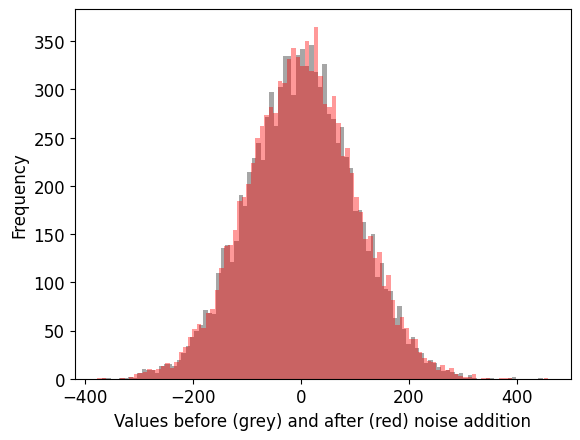

In [5]:
plt.hist(query_list, bins = 100, alpha = 0.7, color = 'grey')
plt.hist(noisy_list, bins = 100, alpha = 0.4, color = 'red')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Values before (grey) and after (red) noise addition', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

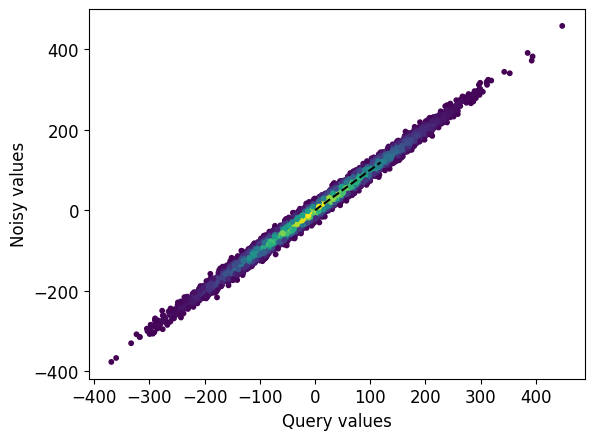

In [6]:
from scipy.stats import gaussian_kde

xy = np.vstack([query_list,noisy_list])
z = gaussian_kde(xy)(xy)

plt.scatter(query_list, noisy_list, c = z, s=10)
plt.plot(np.arange(0,120), np.arange(0,120), linestyle='dashed', color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Query values', fontsize = 12)
plt.ylabel('Noisy values', fontsize = 12)
plt.show()